<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unsupervised Learning

---

# Housekeeping

- UP3 has been released: due by 6pm on Monday 6th August.

- UP2 feedback should be with you.

- FP2 feedback should be back to you by Wednesday evening.

- Start working on FP3 submission: this will be EDA on your project data - Jupyter notebook/data to be submitted via Github. Due by 6pm, Wednesday 8th August.


So far, we have primarily studied supervised algorithms: Each observation (row of data) comes with one or more labels -- either categorical variables (classes) or measurements (regression).

Supervised learning focuses on finding a relationship between a matrix of features and a response variable. 



There is typically additional (latent) structure hiding in the feature matrix. For example, some features might be related to each other or even redundant. There also could be groups of observations that seem to be related.

Taking advantage of these latent structures allows us to study data without an explicit response in mind and to find better representations for our data to improve predictive performance.



**Unsupervised learning** is designed to identify these kinds of structural relationships in our data.

> **The primary goal of unsupervised learning is "representation."** Unsupervised learning extracts structure from data. For example, you could segment grocery-store shoppers into "clusters" of shoppers who exhibit similar behaviors.

**Unsupervised learning is clearly differentiated from supervised learning.** 

With unsupervised learning:

- There's no clear objective.
- There's no "right answer" (which means it's hard to tell how well you're doing).
- There's no response variable — only observations with features.
- Labeled data is not required.

<a id="common-types-of-unsupervised-learning"></a>
### Common Types of Unsupervised Learning

**Clustering:** Group “similar” data points together.



**Dimensionality Reduction:** Reduce the dimensionality of a data set by extracting features that capture most of the variance in the data.

### Using Multiple Types of Learning Together
None of these techniques are mutually exclusive, and they can be used in combination for better results. A useful example is **transfer learning**.



Imagine you have a 100,000-row data set with no response values. Your job is to create a response with hand-labels and then create an algorithm to predict the response using supervised learning. 



Unfortunately, you only have time to label 10,000 rows. Does that mean the rest of the data is useless?



The extra 90,000 rows are very useful! We can first use unsupervised learning to identify hidden structures such as related features and groups that naturally form in our data. The unsupervised learning algorithms can transform both our unlabeled and labeled data into a form that's easier to predict from.



We then use the new transformed data with supervised learning to get the predictions we were looking for.

## Clustering


We're going to cover three major clustering approaches:

- **Centroid clustering using k-means:** Looks for the centers of k pre-specified groups.



- **Density-based clustering using DBSCAN:** Looks at gaps, or lack thereof, between datapoints.


- **Hierarchical clustering using agglomerative clustering:** Forms groups of groups of groups in a hierarchy to determine clusters.


#### K-Means Clustering

Similarly to k-nearest neighbors, this partitions the entire space into regions (Voronoi partitions). In k-means clustering, k refers to the number of clusters. Also, since this is unsupervised learning, the regions are determined by the k-means algorithm instead of being provided by the training data.


![](./assets/images/clustering-centroids.png)

#### Density-Based Clustering

<img src="assets/images/density-clusters.png" style="width:60%" />

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), clusters are created from areas of high density. This can lead to irregularly shaped regions. Also, many parts of space may not belong to any region.



#### Hierarchical Clustering

In hierarchical clustering, clusters are composed by joining clusters together.

<img src="assets/images/hierarchical-clustering.png" style="width:40%" />




Here, we see a tree data structure that stores clusters of points:


- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.



## K-Means: Centroid Clustering


K-means clustering is a popular centroid-based clustering algorithm.
 
In k-means clustering, we find $k$ clusters (where $k$ is user-specified), each distributed around a single point (called a **centroid**, an imaginary "center point" or the cluster's "center of mass").

> **K-means seeks to minimize the sum of squares of each point about its cluster centroid.**

If we manage to minimize this, then we claim to have found good clusters.


### K-means seeks to minimize the sum of squares of each point about its cluster centroid.
 
Let's see step-by-step how we might write an error function that describes this goal. Luckily, we already have experience with sum of squares, so we'll start there. 


#### Step One: Definitions

Let's step through a few definitions we'll need to formalize the statement. Note that every data point must belong to exactly one cluster.


- $S_i$ is the set of points in the $i$th cluster. For example:
    - $S_1 = \{(1, 1), (2, 1), (0, 1)\}$.
    - $S_2 = \{(10, 10), (12, 10)\}$.




- $x$ is an arbitrary point. For example:
    - $x = (2, 1)$.
    - Note that $x \in S_1$. This reads: "$x$ belongs to $S_1$" or just "$x$ in $S_1$."
    



- $\mu_i$ is the centroid ("center point") of all points in $S_i$. For example:
    - $\mu_1 = (\frac{1+2+0}{3}, \frac{1+1+1}{3}) = (1, 1)$.
    - $\mu_2 = (\frac{10+12}{2}, \frac{10+10}{2}) = (11, 10)$.

#### Step Two: Error of one cluster

We need to measure the "tightness" of each cluster -- the closer its points are to the centroid, the better. So, we'll measure how far away each point is from the centroid. Further, we'll square each distance to particularly penalize far away points.



So, the sum of the distances of each point $x$ to $\mu$ is just:

$$E_i(S) = {\sum_{x \in S} {\|x - \mu\|^2}}$$

> This is read: "The sum of the square distances of each point in S to the centroid of S."



#### Step Three: Sum of all cluster errors

Now, let's find this sum for each cluster. If we sum these sums together, that is the total error for all $k$ clusters:

$$E_{total}(S_1, ..., S_k) = \sum_{i=1}^k E_i(S_i)$$

$$= \sum_{i=1}^k {\sum_{x \in S} {\|x - \mu\|^2}}$$



#### Step Four: Find the clusters that minimize total error

Precisely, find $k$ partitions $S_1, …, S_k$ of the data with centroids $\mu_1, …, \mu_k$ that minimize $E_{total}$. 



In other words:

$$\text{argmin}_{S_1, …, S_k} \sum_{i=1}^k {\sum_{x \in S_i} {\|x - \mu_i\|^2}}$$

> $\text{argmin}_{S_1, …, S_k}\ f(S_1, ..., S_k)$: Find the values of $S_1, ..., S_k$ that minimize $f(S_1, ..., S_k)$.

This is a computationally difficult problem to solve, so we often rely on heuristics.

The "standard" heuristic is called **Lloyd’s Algorithm**:



1. Start with $k$ initial (random) points* (we'll call these "centroids").
2. Assign each datapoint to a cluster by finding its "closest" centroid (e.g. using Euclidean distance).
3. Calculate new centroids based on the datapoints assigned to each cluster.
4. Repeat 2-4 until clusters do not change.


<a id="assumptions-are-important-k-means-assumes"></a>
### K-Means Assumptions

K-means assumes:

- k is the correct number of clusters.
- The data is isotropically distributed (circular/spherical distribution).
- The variance is the same for each variable.
- Clusters are roughly the same size.

View these resources to see counterexamples/cases where assumptions are not met:
- [Variance Explained](http://varianceexplained.org/r/kmeans-free-lunch/)
- [Scikit-Learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)

<a id="k-means-demo"></a>
## K-Means Demo
---

Let's try some k-means clustering on a dataset of different beer brands (some of which I very loosely describe as beer):

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Beer data set
import pandas as pd
url = 'assets/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head(5)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


#### How would you cluster these beers?

In [2]:
# Define X.
X = beer.drop('name', axis=1)

#### What happened to Y?

<a id="k-means-clustering"></a>
### K-Means Clustering

#### K-means with three clusters

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review the cluster labels.

In [4]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int32)

#### Save the cluster labels and sort by cluster.

In [5]:
beer['cluster'] = km.labels_
beer.head(12)

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1


#### What do the clusters seem to be based on? Why?

#### Review the cluster centers.

In [6]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

#### Calculate the mean of each feature for each cluster.

In [7]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


#### Save the `DataFrame` of cluster centers.

In [8]:
centers = beer.groupby('cluster').mean()

#### Allow plots to appear in the notebook.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

#### Create a "colors" array for plotting.

In [10]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

Text(0,0.5,'alcohol')

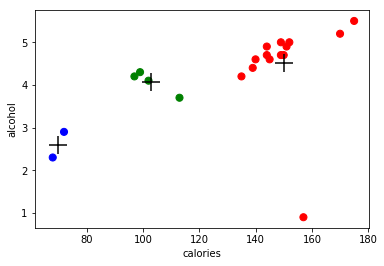

In [11]:
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('calories')
plt.ylabel('alcohol')

#### Scatter plot matrix (0=red, 1=green, 2=blue).

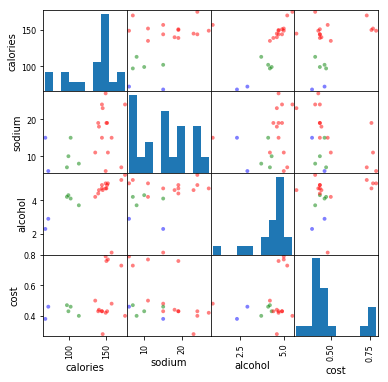

In [12]:
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(6,6), s=60);

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

Remember that k-means is looking for isotropic groups, meaning that they disperse from the center in all directions evenly. 

There is more than one choice of scaling method (min/max, z-score, log, etc.), but the best choice is the one that makes your clusters isotropic.

#### Center and scale the data.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### K-means with three clusters on scaled data.

In [14]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

#### Save the cluster labels and sort by cluster.

In [16]:
beer['cluster'] = km.labels_
beer.sort_values('cluster').head()

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0


#### What are the "characteristics" of each cluster?

#### Review the cluster centers.

In [17]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


#### Scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

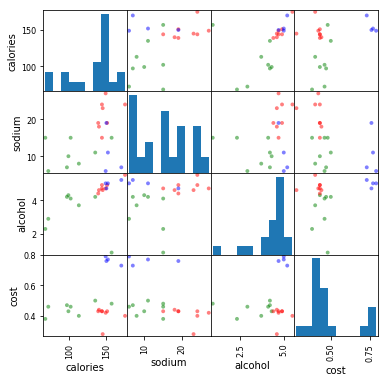

In [18]:
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(6,6), s=60);

### Choosing $k$

#### How do we choose k?

Finding the correct k to use for k-means clustering is not a simple task.

We do not have a ground-truth we can use, so there isn't necessarily a "correct" number of clusters. However, we can find metrics that try to quantify the quality of our groupings.

Our application is also an important consideration. For example, during customer segmentation we want clusters that are large enough to be targetable by the marketing team. In that case, even if the most natural-looking clusters are small, we may try to group several of them together so that it makes financial sense to target those groups.


**Common approaches include:**

- Figuring out the correct number of clusters from previous experience. Using the elbow method to find a number of clusters that no longer seems to improve a clustering metric by a noticeable degree.

- **Silhouette Score**: "how far apart are the clusters?"

- **Inertia:** "sum of squared errors"



**Elbow Method**

This method looks at the percentage of variance explained as a function of the number of clusters: 

- One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 

- More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance). 

- However, but at some point the marginal gain will drop, giving an angle in the graph. 

- The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.

Ranges from 0 (all points = the centroid) to infinitely high values (so lower the better)
  

**Silhouette Score**:

Here is how the Silhouette Coefficient is measured. Keep in mind how this definition compares to our high-level idea of a sample's cohesion vs. separation:

$$\frac {b - a} {max(a,b)}$$

- $a$ is the mean distance between a sample and all other points in the cluster.

- $b$ is the mean distance between a sample and all other points in the nearest cluster.



The coefficient ranges between 1 and -1. The larger the coefficient, the better the clustering.

To get a score for all clusters rather than for a particular point, we average over all points to judge the cluster algorithm.

  - For an example, check out this [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) documentation on sklearn.

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_score(X_scaled, beer['cluster'], metric='euclidean')

0.4577741591090948

So, the clustering is not ideal.

Let's  use the interia values and the elbow method to improve on our value for K

In [20]:
def plot_inertia_values(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    #ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()

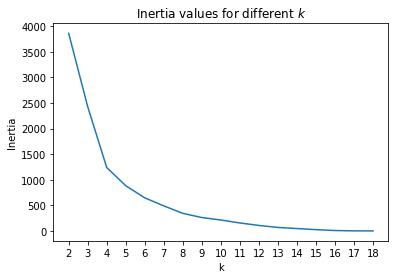

In [21]:
plot_inertia_values(k_min=2, k_max=18)

As with machine learning in general, increasing complexity will increase the "fit"

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.inertia_

1239.4006833333333

In [24]:
kmeans = KMeans(n_clusters=len(X))
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.inertia_

0.0

<a id="dbscan-density-based-clustering"></a>
## DBSCAN: Density-Based Clustering
---

![](./assets/images/dbscan.png)

**DBSCAN: Density-Based Spatial Clustering of Applications With Noise (1996)**

The main idea of DBSCAN is to group together closely packed points by identifying:
- Core points
- Reachable points
- Outliers (not reachable)



**Its two parameters are:**
- `min_samples`: At least this many points are required inside a neighborhood to form a dense cluster.
- `eps`: epsilon. This is the radius of a neighborhood.





- Suppose we have a dataset of n-dimensional data points.


- For each point in the dataset we make an n-dimensional sphere of radius `eps` around the point and count the number of data points within the sphere.


- If the number of points within the sphere are more than `min_samples` then we mark the center of the sphere to be belonging to a cluster. We also mark the points inside the sphere to be belonging to the same cluster. We then recursively expand the cluster by applying the same criteria to the points inside the sphere, except the center.


- In case the number of points inside the sphere are less than min_points, we ignore it and proceed to the next point in the dataset.



**DBSCAN advantages**:
- Can find arbitrarily shaped clusters.
- Don’t have to specify number of clusters.
- Excludes outliers automatically.



**DBSCAN disadvantages**:
- Doesn’t work well when clusters are of varying densities.
- Hard to choose parameters that work for all clusters.
- Can be hard to choose correct parameters.

<a id="dbscan-clustering-demo"></a>
## DBSCAN Clustering Demo
---

In [26]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler



In [27]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

#### DBSCAN with eps=0.3 and min_samples=10.

In [28]:
# #############################################################################
# Compute DBSCAN

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [29]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 3


In [30]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

Text(0.5,1,'Estimated number of clusters: 3')

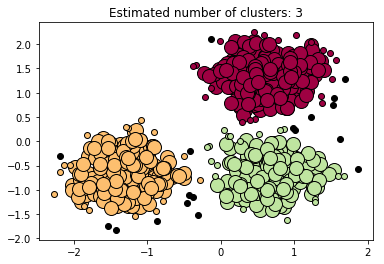

In [31]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

<a id="hierarchical-clustering"></a>
## Hierarchical Clustering
---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests:

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a dendrogram — a graph that displays all of these links in their hierarchical structure.



**As we described earlier:**

- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.

<img src="assets/images/hierarchical-clustering.png" style="width:40%" />


In [32]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_scaled)
labels = agg.labels_

In [33]:
# Save the cluster labels and sort by cluster.
beer['cluster'] = agg.labels_
beer.head(12)

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,3
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0


In [34]:

silhouette_score(X_scaled, labels, metric='euclidean')

0.47546412252215975

<a id="clustering-classification-and-regression"></a>
## Clustering, Classification, and Regression
---

We can use clustering to discover new features, then use those features for either classification or regression.

For classification, we could use clusters directly to classify new points.

For regression, we could use a dummy variable for the clusters as a variable in our regression.

In [35]:
%matplotlib inline


import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

#### Create a function to plot the data.

In [36]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

#### Create some synthetic data.

In [37]:
from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    


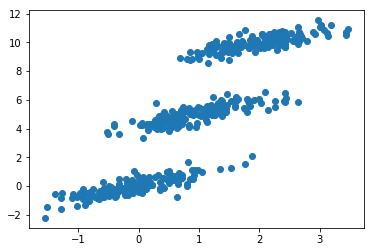

In [38]:
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

#### Find clusters.

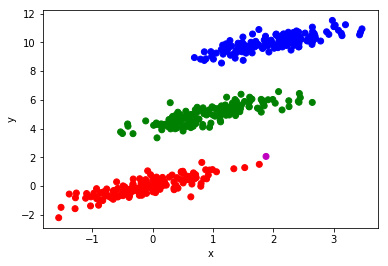

In [39]:
# Fit a DBSCAN estimator.
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute.
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Add cluster labels back to the `DataFrame`.

In [40]:
#Note that -1 clusters are outliers.
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df.head()

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
0,-0.304223,-0.270825,0,0,1,0,0
1,-0.760386,-0.202932,0,0,1,0,0
2,0.880487,1.130041,0,0,1,0,0
3,0.816154,1.642252,0,0,1,0,0
4,-0.048788,-0.100083,0,0,1,0,0


#### Fit a linear model with clusters included.

In [41]:
model = LinearRegression()
X = df[["x", "cluster_0", "cluster_1", "cluster_2"]]
y = df['y']
model.fit(X, y)

print((model.score(X, y)))

0.9921740516579282


#### Plot the model.

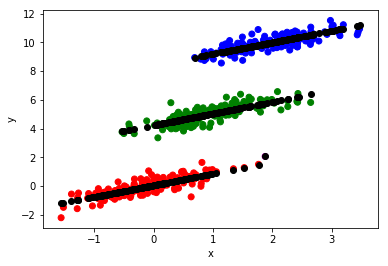

In [42]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

#### What happens if we don't include the clusters we estimated?

In [43]:
model = LinearRegression()
X = df[["x"]]
y = df['y']
model.fit(X, y)
print((model.score(X, y)))



0.7578185345009965


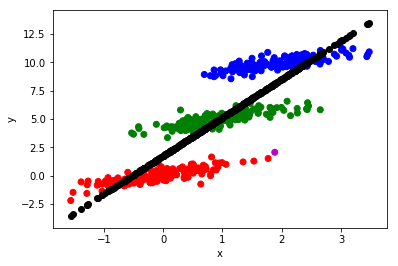

In [44]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

## Comparing Clustering Algorithms

- K-means
  - Finds cluster centers.
  - Must choose the number of clusters.
  - Assumes clusters are isotropic.


- DBSCAN
  - Inspects local density to find clusters.
  - Better than k-means for anisotropic clusters.
  - Capable of finding outliers.



- Hierarchical clustering
  - Finds clusters by forming groups of groups of groups of points.
  - Hierarchical clustering works well for non-spherical clusters.
  - May be computationally expensive.
  - Guaranteed to converge to the same solution (no random initialization).